In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iminuit import Minuit
from scipy.optimize import curve_fit

In [2]:
sio_1 = pd.read_csv('data/sio2_run1.csv', header = 1)
sio_2 = pd.read_csv('data/sio2_run2.csv', header = 1)
lu1 = pd.read_csv('data/ludox_run1.csv', header = 1)
lu2 = pd.read_csv('data/ludox_run2.csv', header = 1)

In [3]:
sio_1.columns

Index(['Unnamed: 0', 'Size (d.nm) - SiO2 np [Steady state]',
       'Intensity (Percent) - SiO2 np [Steady state]',
       'Size (d.nm) - SiO2 np [Steady state].1',
       'Intensity (Percent) - SiO2 np [Steady state].1',
       'Size (d.nm) - SiO2 np [Steady state].2',
       'Intensity (Percent) - SiO2 np [Steady state].2',
       'Size (d.nm) - SiO2 np [Steady state].3',
       'Intensity (Percent) - SiO2 np [Steady state].3',
       'Size (d.nm) - SiO2 np [Steady state].4',
       'Intensity (Percent) - SiO2 np [Steady state].4'],
      dtype='object')

In [4]:
sio_1.drop(columns = ['Unnamed: 0'])
sio_2.drop(columns = ['Unnamed: 0'])
lu1.drop(columns = ['Unnamed: 0'])
lu2.drop(columns = ['Unnamed: 0'])

,Size (d.nm) - ludox 2nd [Steady state],Intensity (Percent) - ludox 2nd [Steady state],Size (d.nm) - ludox 2nd [Steady state].1,Intensity (Percent) - ludox 2nd [Steady state].1,Size (d.nm) - ludox 2nd [Steady state].2,Intensity (Percent) - ludox 2nd [Steady state].2,Size (d.nm) - ludox 2nd [Steady state].3,Intensity (Percent) - ludox 2nd [Steady state].3,Size (d.nm) - ludox 2nd [Steady state].4,Intensity (Percent) - ludox 2nd [Steady state].4
0,0.3000,0.000,0.3000,0.00,0.3000,0.000,0.3000,0.000,0.3000,0.000
1,0.3489,0.000,0.3489,0.00,0.3489,0.000,0.3489,0.000,0.3489,0.000
2,0.4057,0.000,0.4057,0.00,0.4057,0.000,0.4057,0.000,0.4057,0.000
3,0.4718,0.000,0.4718,0.00,0.4718,0.000,0.4718,0.000,0.4718,0.000
4,0.5487,0.000,0.5487,0.00,0.5487,0.000,0.5487,0.000,0.5487,0.000
...,...,...,...,...,...,...,...,...,...,...
65,5468.0000,4.293,5468.0000,5.77,5468.0000,2.018,5468.0000,4.727,5468.0000,2.757
66,6358.0000,0.000,6358.0000,0.00,6358.0000,0.000,6358.0000,0.000,6358.0000,0.000
67,7394.0000,0.000,7394.0000,0.00,7394.0000,0.000,7394.0000,0.000,7394.0000,0.000
68,8599.0000,0.000,8599.0000,0.00,8599.0000,0.000,8599.0000,0.000,8599.0000,0.000


In [5]:
sio_2.columns

Index(['Unnamed: 0', 'Size (d.nm) - SiO2 np - 2nd [Steady state]',
       'Intensity (Percent) - SiO2 np - 2nd [Steady state]',
       'Size (d.nm) - SiO2 np - 2nd [Steady state].1',
       'Intensity (Percent) - SiO2 np - 2nd [Steady state].1',
       'Size (d.nm) - SiO2 np - 2nd [Steady state].2',
       'Intensity (Percent) - SiO2 np - 2nd [Steady state].2',
       'Size (d.nm) - SiO2 np - 2nd [Steady state].3',
       'Intensity (Percent) - SiO2 np - 2nd [Steady state].3',
       'Size (d.nm) - SiO2 np - 2nd [Steady state].4',
       'Intensity (Percent) - SiO2 np - 2nd [Steady state].4'],
      dtype='object')

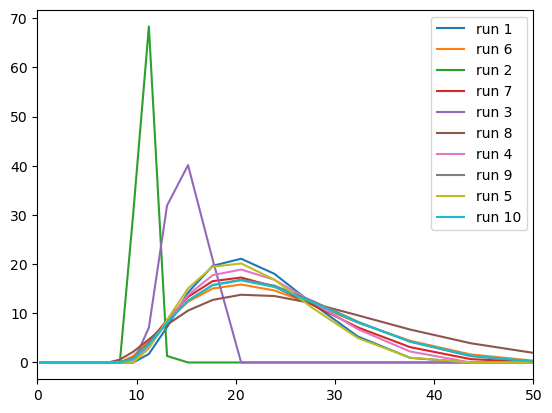

In [6]:
for i in range(1, len(sio_1.columns), 2): 
    plt.plot(sio_1[sio_1.columns[i]], sio_1[sio_1.columns[i + 1]], label=f'run {i//2 + 1}')
    plt.plot(sio_2[sio_2.columns[i]], sio_2[sio_2.columns[i + 1]], label=f'run {i//2 + 1 + 5}')
plt.xlim(0,50)
plt.legend()

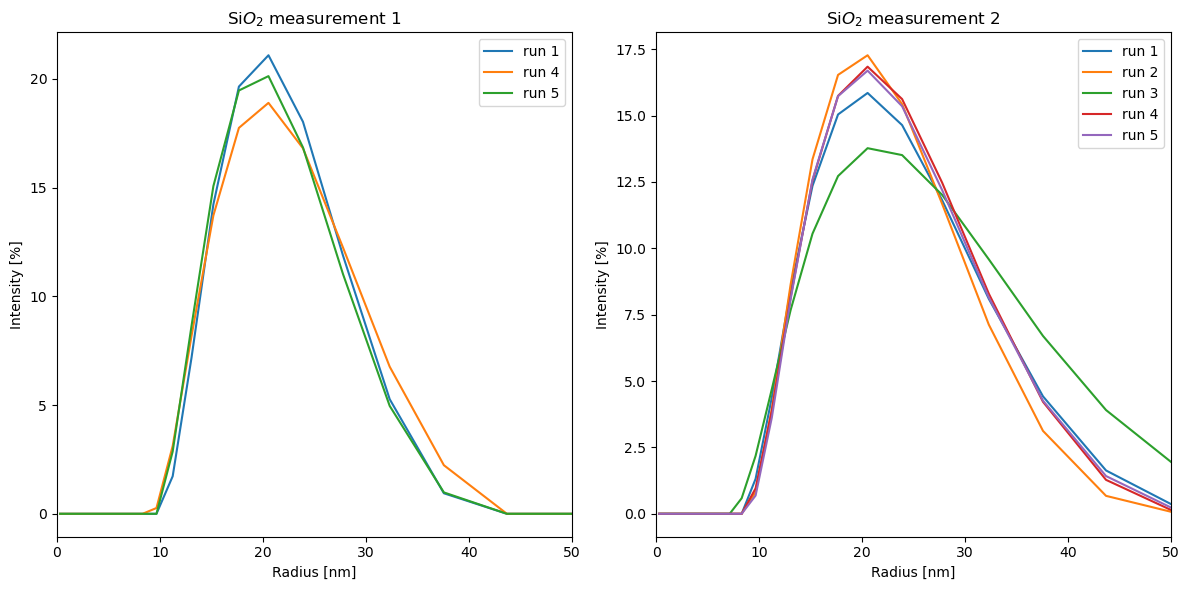

In [7]:
# Create a figure with two subplots side by side
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# First subplot
for i in range(1, len(sio_1.columns), 2):
    ax1.plot(sio_2[sio_2.columns[i]], sio_2[sio_2.columns[i + 1]], label=f'run {i//2 + 1}')
ax1.set_xlim(0, 50)
ax1.legend()
ax1.set_title(r'Si$O_2$ measurement 2')
ax1.set_xlabel('Radius [nm]')
ax1.set_ylabel('Intensity [%]')

# Second subplot
for i in range(1, len(sio_1.columns), 2):
    if i == 3 or i == 5:
        continue  # Skip plotting for i = 3 or 5 bad runs
    try:
        ax2.plot(sio_1[sio_1.columns[i]], sio_1[sio_1.columns[i + 1]], label=f'run {i//2 + 1}')
    except Exception as e:
        print(f"Error plotting for i={i}: {e}")
ax2.set_xlim(0, 50)
ax2.legend()
ax2.set_title(r'Si$O_2$ measurement 1')
ax2.set_xlabel('Radius [nm]')
ax2.set_ylabel('Intensity [%]')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


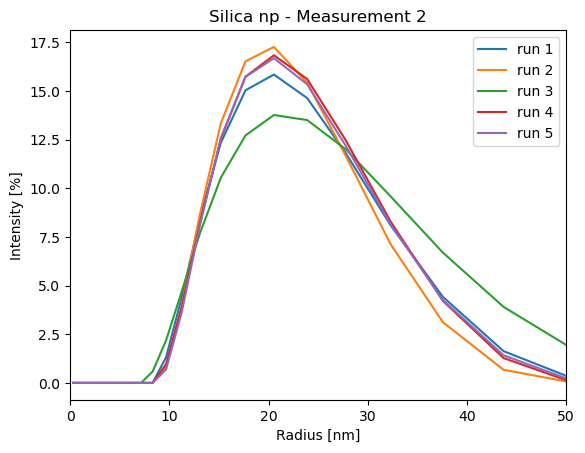

In [8]:
for i in range(1, len(sio_1.columns), 2):
    plt.plot(sio_2[sio_2.columns[i]], sio_2[sio_2.columns[i + 1]], label=f'run {i//2 + 1}')
plt.xlim(0,50)
plt.legend()
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')
plt.title('Silica np - Measurement 2')
plt.savefig('silica_2.png')

In [9]:
print(np.argmax(sio_2[sio_2.columns[2]]))
print(sio_2[sio_2.columns[i]][28])

28
20.53


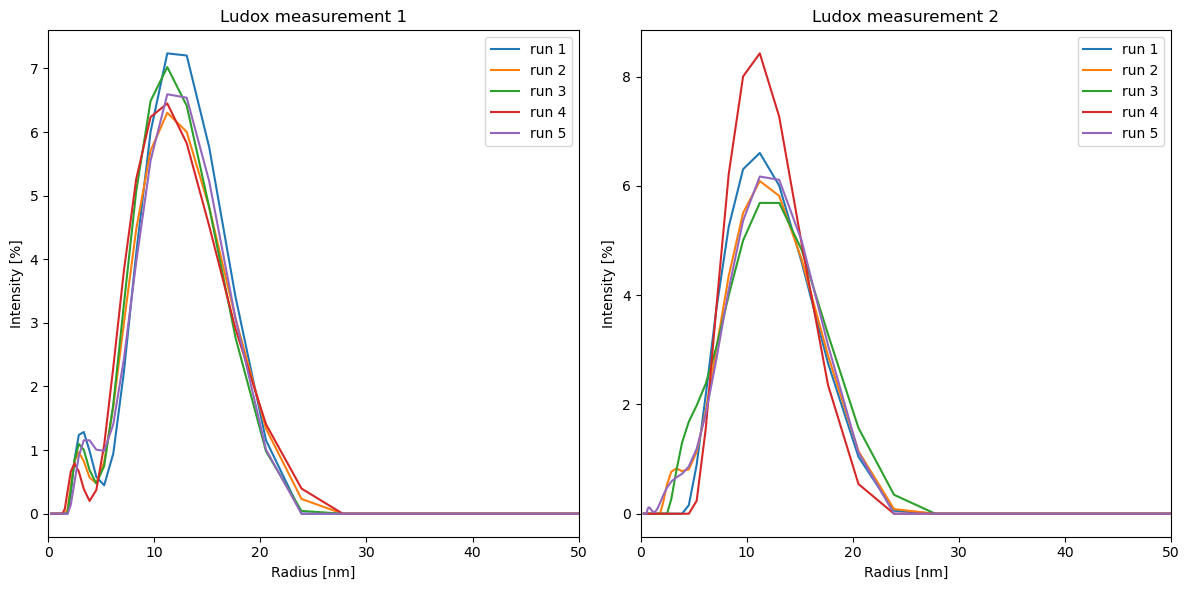

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# First subplot
for i in range(1, len(lu1.columns), 2): 
    ax1.plot(lu1[lu1.columns[i]], lu1[lu1.columns[i + 1]], label=f'run {i//2 + 1}')
ax1.set_xlim(0, 50)
ax1.legend()
ax1.set_title(r'Ludox measurement 1')
ax1.set_xlabel('Radius [nm]')
ax1.set_ylabel('Intensity [%]')

# Second subplot
for i in range(1, len(sio_1.columns), 2): 
    ax2.plot(lu2[lu2.columns[i]], lu2[lu2.columns[i + 1]], label=f'run {i//2 + 1}')
ax2.set_xlim(0, 50)
ax2.legend()
ax2.set_title(r'Ludox measurement 2')
ax2.set_xlabel('Radius [nm]')
ax2.set_ylabel('Intensity [%]')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

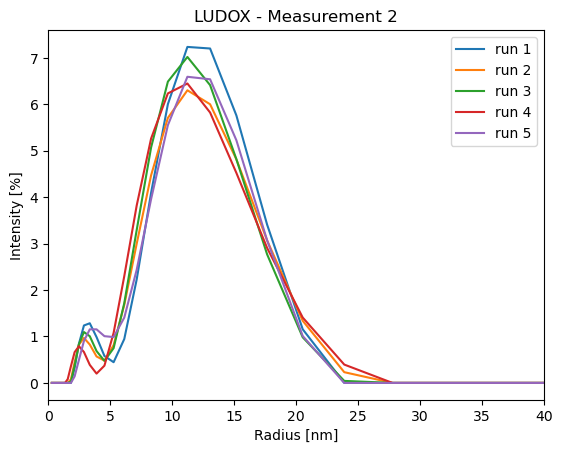

In [11]:
for i in range(1, len(lu1.columns), 2): 
    plt.plot(lu1[lu1.columns[i]], lu1[lu1.columns[i + 1]], label=f'run {i//2 + 1}')
plt.xlim(0,40)
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')
plt.title('LUDOX - Measurement 2')
plt.legend()
plt.savefig('ludox_2.png')

In [12]:
print(np.argmax(lu1[lu1.columns[2]]))
print(lu1[lu1.columns[i]][24])

24
11.23


## Fitting

In [13]:
x_axis = lu1[lu1.columns[1]][0:35]

In [14]:
def gauss(x, H, A, x0, sigma): 
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def chi2_lu1(H, A, x0, sigma):
    model = gauss(x_axis, H, A, x0, sigma)
    exp = np.array(lu1[lu1.columns[2]][0:35])
    return np.sum(((exp - model) / np.std(exp)) ** 2)

In [15]:
fit_lu1 = Minuit(chi2_lu1, H=0.1, A=7, x0=11, sigma=0.5)
fit_lu1.migrad()

x_fit = np.linspace(0, max(x_axis), 150)
lu1_vals = fit_lu1.values

y_fit = gauss(x_fit, lu1_vals['H'], lu1_vals['A'], lu1_vals['x0'], lu1_vals['sigma'])

(0.0, 40.0)

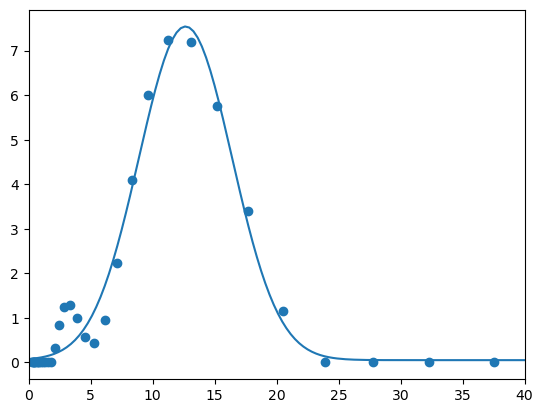

In [16]:
plt.plot(x_fit, y_fit)
plt.scatter(lu1[lu1.columns[1]], lu1[lu1.columns[2]])
plt.xlim(0,40)

In [17]:
print(lu1_vals)

<ValueView H=0.052399257866458916 A=7.490181043879046 x0=12.653970781921734 sigma=3.7559741278056205>


In [18]:
def ddg(x, H, A1, x1, sigma1, A2, x2, sigma2):
    gauss1 = H + A1 * np.exp(-(x - x1)**2 / (2 * sigma1**2))
    gauss2 = A2 * np.exp(-(x - x2)**2 / (2 * sigma2**2))
    return gauss1 + gauss2

def chi2_ddg1(H, A1, x1, sigma1, A2, x2, sigma2):
    model = ddg(x_axis, H, A1, x1, sigma1, A2, x2, sigma2)
    exp = np.array(lu1[lu1.columns[2]][0:35])
    return np.sum(((exp - model) / np.std(exp)) ** 2)

ddg1 = Minuit(chi2_ddg1, H=0.1, A1=7, x1=11, sigma1=0.5,
             A2 = 1.5, x2 = 4, sigma2 = 0.1)
ddg1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3881                     │              Nfcn = 446              │
│ EDM = 1.07e-05 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H      │   -0.1    │    0.5    │            │            │         │         │       │
│ 1 │ A1     │    7.7    │    1.4    │            │            │         │         │       │
│ 2 │ x1     │   12.7    │    0.8    │            │            │         │         │       │
│ 3 │ sigma1 │    3.7    │    0.8    │            │            │         │         │       │
│ 4 │ A2     │    1.2    │    1.7    │            │            │         │         │       │
│ 5 │ x2     │    3.1    │    1.0    │            │            │         │         │       │
│ 6 │ sigma2 │    0.6    │    0.9    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────┐
│        │      H     A1     x1 sigma1     A2     x2 sigma2 │
├────────┼──────────────────────────────────────────────────┤
│      H │  0.278  -0.19  -0.03  -0.20  -0.15   0.04  -0.10 │
│     A1 │  -0.19   2.04   -0.0   -0.4    0.3    0.0    0.2 │
│     x1 │  -0.03   -0.0  0.672    0.3    0.0    0.0    0.0 │
│ sigma1 │  -0.20   -0.4    0.3  0.722   -0.1   -0.1   -0.0 │
│     A2 │  -0.15    0.3    0.0   -0.1   2.97    0.0   -0.6 │
│     x2 │   0.04    0.0    0.0   -0.1    0.0   1.06    0.2 │
│ sigma2 │  -0.10    0.2    0.0   -0.0   -0.6    0.2  0.775 │
└────────┴──────────────────────────────────────────────────┘

In [19]:
gyatt = np.array(ddg1.values)
print(*gyatt)

-0.05679770919827666 7.700839031369163 12.675509446691404 3.6896169086382673 1.1761051856971085 3.130873526939884 0.5817056893452814


In [20]:
ddg1.errors

<ErrorView H=0.5270369979808834 A1=1.4282170792191684 x1=0.8200182973137212 sigma1=0.8496768883350383 A2=1.7236390411748945 x2=1.0316238916986171 sigma2=0.8802774228212019>

In [21]:
ddg1_x = np.linspace(0, max(x_axis), 150)
ddg1_y = ddg(ddg1_x, *gyatt)

(0.0, 40.0)

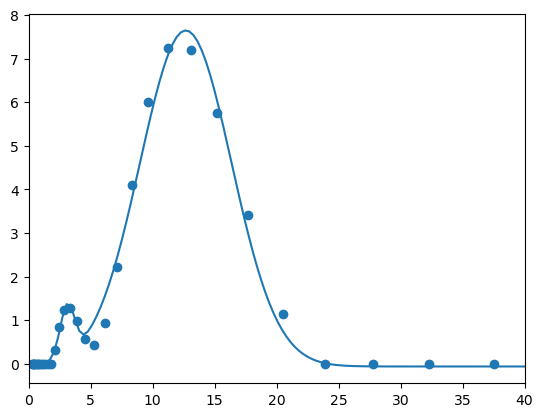

In [22]:
plt.plot(ddg1_x, ddg1_y)
plt.scatter(lu1[lu1.columns[1]], lu1[lu1.columns[2]])
plt.xlim(0,40)

In [23]:
def ddg_all(data):
    x_axis = data[data.columns[1]][0:35]
    y_data = data[data.columns[2]][0:35]
    
    def ddg(x, H, A1, x1, sigma1, A2, x2, sigma2):
        gauss1 = H + A1 * np.exp(-(x - x1)**2 / (2 * sigma1**2))
        gauss2 = A2 * np.exp(-(x - x2)**2 / (2 * sigma2**2))
        return gauss1 + gauss2

    def chi2_ddg1(H, A1, x1, sigma1, A2, x2, sigma2):
        model = ddg(x_axis, H, A1, x1, sigma1, A2, x2, sigma2)
        return np.sum(((y_data - model) / np.std(y_data)) ** 2)

    ddg1 = Minuit(chi2_ddg1, H=0.1, A1=7, x1=11, sigma1=0.5,
             A2 = 1.5, x2 = 4, sigma2 = 0.1)
    ddg1.migrad()

    values = np.array(ddg1.values)
    errors = np.array(ddg1.errors)

    return values, errors

In [24]:
ddg_all(lu1)

(array([-0.05679771,  7.70083903, 12.67550945,  3.68961691,  1.17610519,
         3.13087353,  0.58170569]),
 array([0.527037  , 1.42821708, 0.8200183 , 0.84967689, 1.72363904,
        1.03162389, 0.88027742]))

In [25]:
def ddg_all(data, num_runs=5):
    vals = []
    errs = [] 
    
    for i in range(num_runs):
        x_axis = data[data.columns[2 * i + 1]][0:35]  # X-axis column for the i-th run
        y_data = data[data.columns[2 * i + 2]][0:35]  # Y-axis column for the i-th run

        # Double Gaussian function
        def ddg(x, H, A1, x1, sigma1, A2, x2, sigma2):
            gauss1 = H + A1 * np.exp(-(x - x1)**2 / (2 * sigma1**2))
            gauss2 = A2 * np.exp(-(x - x2)**2 / (2 * sigma2**2))
            return gauss1 + gauss2

        # Chi-squared function for the double Gaussian
        def chi2_ddg1(H, A1, x1, sigma1, A2, x2, sigma2):
            model = ddg(x_axis, H, A1, x1, sigma1, A2, x2, sigma2)
            return np.sum(((y_data - model) / np.std(y_data)) ** 2)

        # Fit the model using Minuit
        ddg1 = Minuit(chi2_ddg1, H=0.1, A1=max(y_data[0:30]), x1=x_axis[np.argmax(y_data[0:30])], sigma1=0.5, A2=max(y_data[0:19]),
                      x2=x_axis[np.argmax(y_data[0:19])], sigma2=0.5)
        ddg1.migrad()

        # Store the fitted values and errors for this run
        values = np.array(ddg1.values)
        errors = np.array(ddg1.errors)
        
        vals.append(values)
        errs.append(errors)
        

    return vals, errs


In [26]:
np.argmax(lu1[lu1.columns[2]][0:35])
x_axis[24]

11.23

In [27]:
lu1_vals, lu1_errs = ddg_all(lu1)

In [28]:
lu1_vals

[array([-0.05888101,  7.71270542, 12.67078189,  3.6840202 ,  1.17938222,
         3.12840492,  0.58529969]),
 array([-0.09045944,  6.61841934, 12.35250768,  4.08429428,  0.67463027,
         2.78745706,  0.42372901]),
 array([-0.07381029,  7.32128192, 11.96081383,  3.75354245,  0.83698379,
         2.89880258,  0.44875838]),
 array([-0.06683427,  6.78094787, 11.8900867 ,  4.04745647,  0.07581605,
         2.69775612, -0.03650374]),
 array([-0.06544083,  6.93340012, 12.52943283,  3.88919926,  0.84114533,
         3.4265005 ,  0.63063467])]

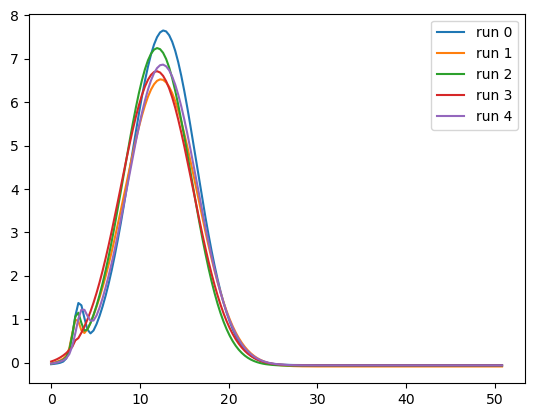

In [29]:
for i in range(len(lu1_vals)):
    y = ddg(ddg1_x, *lu1_vals[i])
    plt.plot(ddg1_x, y, label = 'run {}'.format(i))
    plt.legend()
#plt.xlim(0,8)
#plt.ylim(0,2)

(0.0, 40.0)

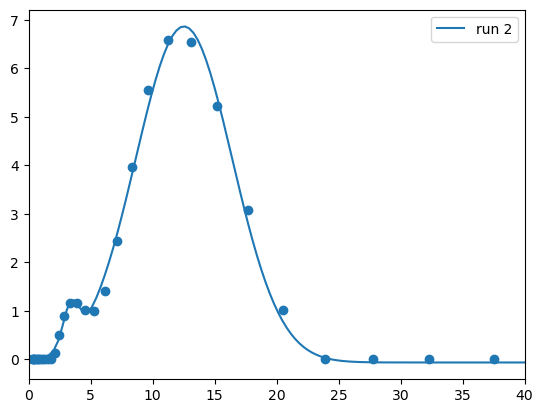

In [30]:
y = ddg(ddg1_x, *lu1_vals[4])
plt.plot(ddg1_x, y, label = 'run {}'.format(2))
plt.scatter(lu1[lu1.columns[9]], lu1[lu1.columns[10]])
plt.legend()
plt.xlim(0,40)

In [31]:
lu2_vals, lu2_errs = ddg_all(lu2)

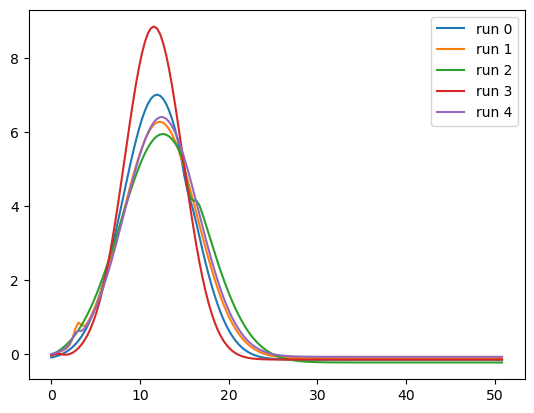

In [32]:
for i in range(len(lu2_vals)):
    y = ddg(ddg1_x, *lu2_vals[i])
    plt.plot(ddg1_x, y, label = 'run {}'.format(i))
    plt.legend()

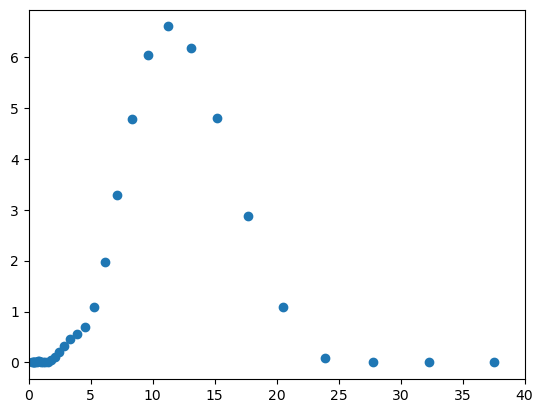

In [33]:
lu1_avg = [lu1[lu1.columns[i + 1]].values for i in range(1, len(lu1.columns), 2)]
lu2_avg = [lu2[lu2.columns[i + 1]].values for i in range(1, len(lu2.columns), 2)]

# Convert to a NumPy array and calculate the average
lu1_mean = np.mean(lu1_avg, axis = 0)
lu2_mean = np.mean(lu2_avg, axis = 0)

plt.scatter(lu2[lu2.columns[9]], lu2_mean)
plt.xlim(0, 40)

avg_x = lu2[lu2.columns[9]]

In [34]:
#Minuit(chi2_ddg1, H=0.1, A1=max(y_data[0:30]), x1=x_axis[np.argmax(y_data[0:30])], sigma1=0.5, A2=max(y_data[0:19]),
#                      x2=x_axis[np.argmax(y_data[0:19])], sigma2=0.5)

In [35]:
def chi2_m1(H, A1, x1, sigma1, A2, x2, sigma2):
    model = ddg(x_axis, H, A1, x1, sigma1, A2, x2, sigma2)
    exp = lu1_mean[0:35]
    return np.sum(((exp - model) / np.std(exp)) ** 2)
    
def chi2_m2(H, A1, x1, sigma1, A2, x2, sigma2):
    model = ddg(x_axis, H, A1, x1, sigma1, A2, x2, sigma2)
    exp = lu2_mean[0:35]
    return np.sum(((exp - model) / np.std(exp)) ** 2)

fit_m1 = Minuit(chi2_m1, H = 0.1, A1 = max(lu1_mean[0:30]), x1 =avg_x[np.argmax(lu1_mean[0:30])], sigma1 = 0.5,
               A2 = max(lu1_mean[0:19]), x2 = avg_x[np.argmax(lu1_mean[0:19])], sigma2 = 0.5)

fit_m2 = Minuit(chi2_m2, H = 0.1, A1 = max(lu2_mean[0:30]), x1 =avg_x[np.argmax(lu2_mean[0:30])], sigma1 = 0.5,
               A2 = max(lu2_mean[0:19]), x2 = avg_x[np.argmax(lu2_mean[0:19])], sigma2 = 0.5)

fit_m1.migrad()
m1 = np.array(fit_m1.values)
e1 = np.array(fit_m1.errors)

fit_m2.migrad()
m2 = np.array(fit_m2.values)
e2 = np.array(fit_m2.errors)

In [36]:
print(m2)
print(e2)

[-0.03358689  6.87492332 11.18584581  4.834469   -1.91698095  5.20144691
 -2.8836865 ]
[0.85724901 3.80193967 6.07443051 3.45982344 9.62894317 3.95841369
 5.10392646]


In [37]:
fit_m2.fval

0.06905273493347508

In [38]:
avg_x

0         0.3000
1         0.3489
2         0.4057
3         0.4718
4         0.5487
         ...    
65     5468.0000
66     6358.0000
67     7394.0000
68     8599.0000
69    10000.0000
Name: Size (d.nm) - ludox 2nd [Steady state].4, Length: 70, dtype: float64

In [39]:
avg_x = np.linspace(0, 150, int(max(lu1[lu1.columns[9]])))
avg_y1 = ddg(avg_x, *m1)
avg_y2 = ddg(avg_x, *m2)

Text(0.5, 1.0, 'Fit of the average particle distribution of LUDOX')

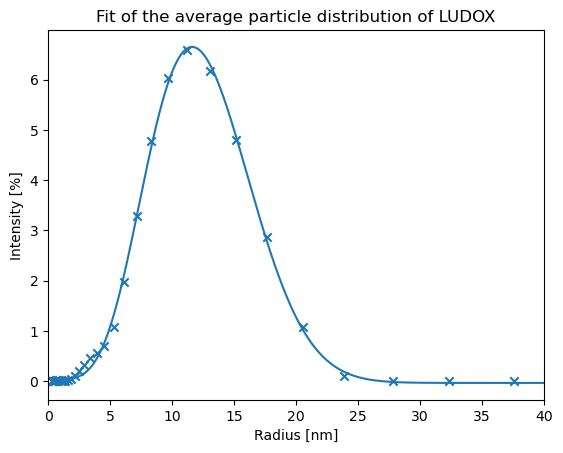

In [40]:
plt.scatter(lu1[lu1.columns[9]], lu2_mean, marker = 'x', label = 'Average measured particle distribution')
#plt.scatter(lu1[lu1.columns[9]], lu2_mean, marker = '+')
plt.plot(avg_x, avg_y2, label = 'Fitted particle distribution')
#plt.plot(avg_x, avg_y2)
plt.xlim(0, 40)
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')
plt.title('Fit of the average particle distribution of LUDOX')
#plt.savefig('LUDOX_avg_fit.png', dpi = 300)

## Silica np

In [41]:
from scipy.special import erf

x_sfit = np.linspace(0,sio_2[sio_2.columns[i]][35], 150)
x_si = sio_2[sio_2.columns[1]][0:35]

def gp(x, mu, sigma, A, gamma, x0):
    gaussian_part = np.exp(-((x - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    powerlaw_part = A * (x - x0)**(-gamma) * (x > x0)  # Only applies for x > x0
    return gaussian_part + powerlaw_part

def chi2_sk(mu, sigma, A, gamma, x0):
    y = gp(x_si, mu, sigma, A, gamma, x0)
    real = sio_2[sio_2.columns[2]][0:35]
    chi2 = np.sum(((real - y) / np.std(real)) ** 2)
    return chi2

In [42]:
si_fit = Minuit(chi2_sk, mu = 20, sigma = 0.7, A = 0.1, gamma = 1, x0 = 20)
si_fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.4                       │              Nfcn = 212              │
│ EDM = 3.04e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │     0     │   2.2e3   │            │            │         │         │       │
│ 1 │ sigma │     0     │   0.7e3   │            │            │         │         │       │
│ 2 │ A     │   0.080   │   0.012   │            │            │         │         │       │
│ 3 │ gamma │   8.56    │   0.24    │            │            │         │         │       │
│ 4 │ x0    │  19.991   │   0.009   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          A      gamma         x0 │
├───────┼────────────────────────────────────────────────────────┤
│    mu │   4.98e+06     -1.6e6    3.64422      73.51    2.86020 │
│ sigma │     -1.6e6   5.19e+05   -1.19036     -24.01 -934.27e-3 │
│     A │    3.64422   -1.19036   0.000136   -0.38e-3   -0.01e-3 │
│ gamma │      73.51     -24.01   -0.38e-3     0.0557   -0.30e-3 │
│    x0 │    2.86020 -934.27e-3   -0.01e-3   -0.30e-3   8.44e-05 │
└───────┴────────────────────────────────────────────────────────┘

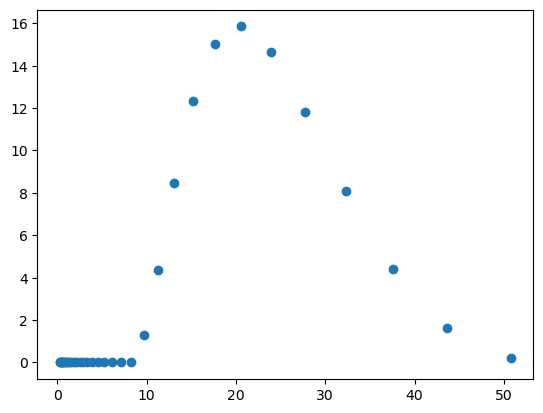

In [43]:
s_fit_vals = np.array(si_fit.values)
s_fity = gp(x_sfit, *s_fit_vals)

plt.scatter(sio_2[sio_2.columns[1]][0:35], sio_2[sio_2.columns[2]][0:35])
plt.plot(x_sfit, s_fity)

In [44]:
s_fit_vals

array([17.89269267,  0.65446447,  0.07994668,  8.55994911, 19.99111597])

In [45]:
si2_avg = [sio_2[sio_2.columns[i + 1]].values for i in range(1, len(sio_2.columns), 2)]
si2_mean = np.mean(si2_avg, axis = 0)

si2_avg1 = [sio_1[sio_1.columns[i + 1]].values for i in range(1, len(sio_1.columns), 2)]
si2_mean1 = np.mean(si2_avg1, axis = 0)

si_x = sio_2[sio_2.columns[1]]

(0.0, 60.0)

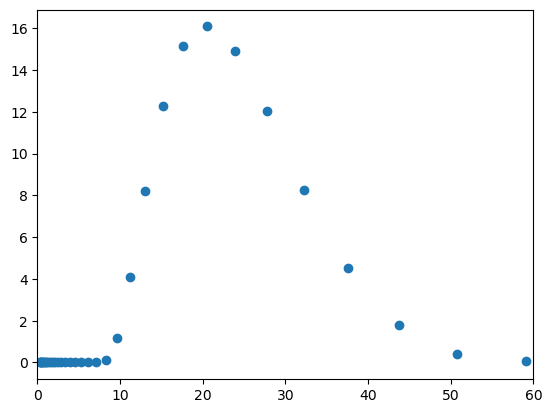

In [46]:
plt.scatter(si_x, si2_mean)
plt.xlim(0,60)

In [100]:
def gg(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))
def chi2_g(a, b, c):
    y = gg(si_x, a, b, c)
    real = si2_mean
    chi2 = np.sum(((real - y) / np.std(real)) ** 2)
    return chi2

def chi2_g1(a, b, c):
    y = gg(si_x, a, b, c)
    real = si2_mean1
    chi2 = np.sum(((real - y) / np.std(real)) ** 2)
    return chi2

sf_avg = Minuit(chi2_g, a = 16, b = 20, c = 3)
sf_avg.migrad()

sf_avg1 = Minuit(chi2_g1, a = 16, b = 20, c = 3)
sf_avg1.migrad()

mm1 = np.array(sf_avg.values)
ee1 = np.array(sf_avg.errors)
cc1 = sf_avg.fval


mm2 = np.array(sf_avg1.values)
ee2 = np.array(sf_avg1.errors)
cc2 = sf_avg1.fval

In [74]:
avg_six = np.linspace(0, 150, int(max(si_x)))

avg_siy = gg(avg_six, *mm2)
avg_siy1 = gg(avg_six, *mm1)

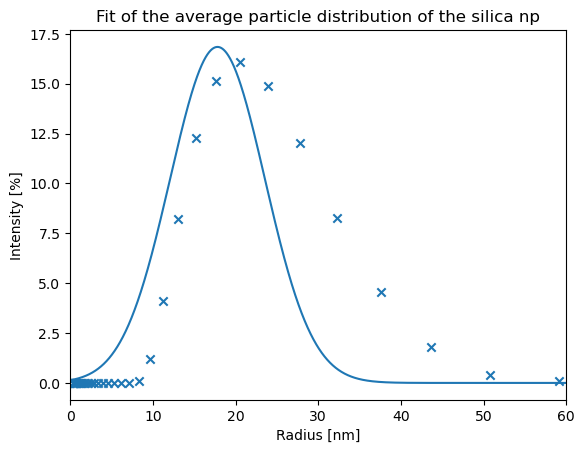

In [75]:
plt.scatter(si_x, si2_mean, marker = 'x')
plt.xlim(0,60)
plt.plot(avg_six, avg_siy)
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')
plt.title('Fit of the average particle distribution of the silica np')
plt.savefig('silica_g_fit.png', dpi = 300)

Text(0, 0.5, 'Intensity [%]')

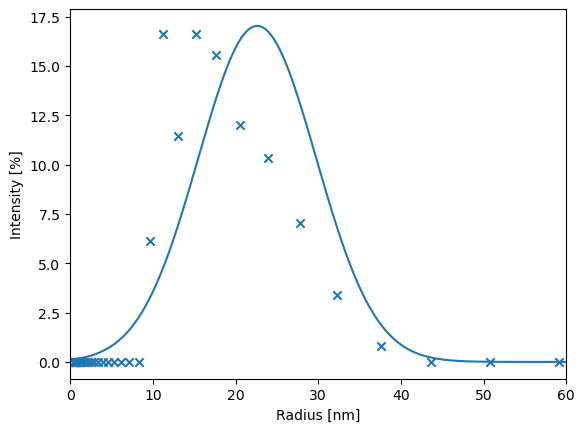

In [76]:
plt.scatter(si_x, si2_mean1, marker = 'x')
plt.xlim(0,60)
plt.plot(avg_six, avg_siy1)
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')

In [77]:
si2_mean1[0:40]

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  6.12718,
       16.6198 , 11.4472 , 16.63   , 15.554  , 12.024  , 10.338  ,
        7.026  ,  3.3994 ,  0.8325 ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ])

## Skewed normal

In [78]:
from scipy.stats import skewnorm


(0.0, 50.0)

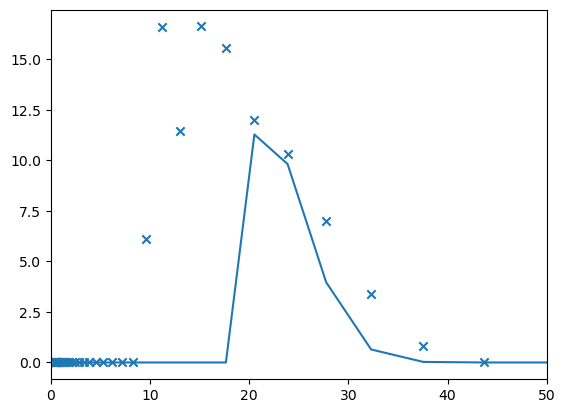

In [79]:
plt.plot(si_x, skewnorm.pdf(si_x, 10, loc=20, scale=5) * max(si2_mean1) * 5)
plt.scatter(si_x, si2_mean1, marker = 'x')
plt.xlim(0,50)

In [80]:
from scipy import stats

ssm = stats.skewnorm.fit(si2_mean1[0:40])

In [81]:
def skew_norm(x, amp, a, loc, scale):
    return amp * skewnorm.pdf(x, a, loc=loc, scale=scale)

def skew_chi2(amp, a, loc, scale):
    model = skew_norm(si_x[0:40], amp, a, loc, scale)
    real = si2_mean1[0:40]
    chi2 = np.sum(((real - model) / np.std(real)) ** 2)
    return chi2

def skew2_chi2(amp, a, loc, scale):
    model = skew_norm(si_x[0:40], amp, a, loc, scale)
    real = si2_mean[0:40]
    chi2 = np.sum(((real - model) / np.std(real)) ** 2)
    return chi2

In [82]:
skm = Minuit(skew_chi2, amp = 100, a = 10, loc = 10, scale = 10)
skm.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.097                      │              Nfcn = 149              │
│ EDM = 0.000171 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ amp   │    280    │    60     │            │            │         │         │       │
│ 1 │ a     │  0.03e3   │  0.11e3   │            │            │         │         │       │
│ 2 │ loc   │    9.8    │    0.8    │            │            │         │         │       │
│ 3 │ scale │   13.6    │    3.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │      amp        a      loc    scale │
├───────┼─────────────────────────────────────┤
│   amp │ 3.46e+03    1.3e3     -7.9      146 │
│     a │    1.3e3 1.25e+04    -71.6       91 │
│   loc │     -7.9    -71.6    0.577     -0.6 │
│ scale │      146       91     -0.6     11.3 │
└───────┴─────────────────────────────────────┘

In [83]:
skm2 = Minuit(skew2_chi2, amp = 100, a = 10, loc = 10, scale = 10)
skm2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1049                     │              Nfcn = 231              │
│ EDM = 1.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ amp   │    330    │    70     │            │            │         │         │       │
│ 1 │ a     │     4     │     4     │            │            │         │         │       │
│ 2 │ loc   │   13.8    │    1.9    │            │            │         │         │       │
│ 3 │ scale │    14     │     5     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │      amp        a      loc    scale │
├───────┼─────────────────────────────────────┤
│   amp │ 4.46e+03       71      -30      191 │
│     a │       71     16.3       -6       14 │
│   loc │      -30       -6     3.65       -6 │
│ scale │      191       14       -6     21.4 │
└───────┴─────────────────────────────────────┘

In [84]:
skm_val = np.array(skm.values)
skm_y = skew_norm(avg_six, *skm_val)
skm_err = skm.errors

skm_val2 = np.array(skm2.values)
skm_y2 = skew_norm(avg_six, *skm_val2)
skm_err2 = skm2.errors

In [85]:
print('Run 1:', *skm_val)
print('Unc:', *skm_err)
print('chi2:', skm.fval)

Run 1: 275.60078056047644 27.56650529840947 9.813032589301619 13.623036723940215
Unc: 58.82168567993497 111.81184507328307 0.7598695198085536 3.3569896978379945
chi2: 1.0971552289526092


(0.0, 100.0)

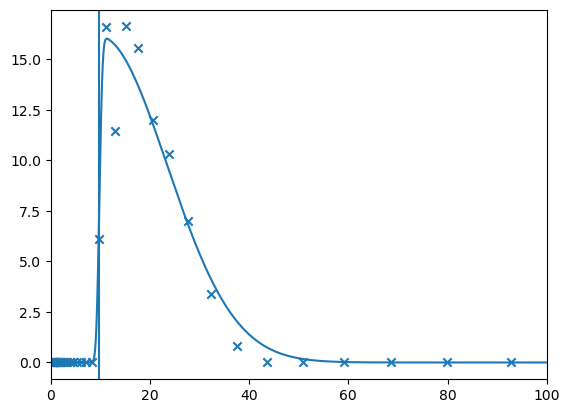

In [86]:
plt.plot(avg_six, skm_y)
plt.scatter(si_x, si2_mean1, marker = 'x')
plt.axvline(x = 9.8)
plt.xlim(0,100)

(0.0, 80.0)

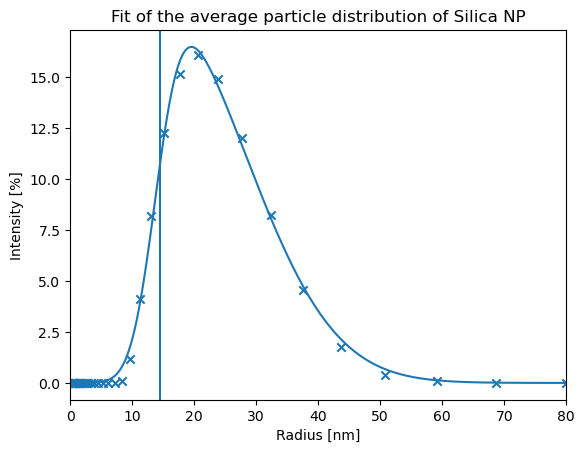

In [87]:
plt.plot(avg_six, skm_y2)
plt.scatter(si_x, si2_mean, marker = 'x')
plt.axvline(x = 14.4)
plt.xlabel('Radius [nm]')
plt.ylabel('Intensity [%]')
plt.title('Fit of the average particle distribution of Silica NP')
plt.xlim(0,80)
#plt.savefig('skew_s1.png', dpi = 300)

In [88]:
skm_val2

array([334.49650505,   4.40188947,  13.82773498,  14.35287793])

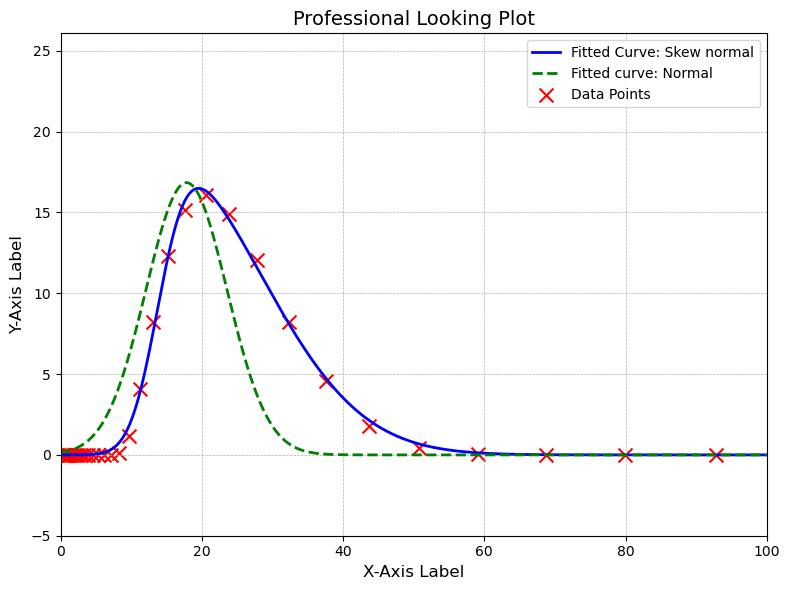

In [89]:
plt.figure(figsize=(8, 6))  # Set figure size

# Plot the line
plt.plot(avg_six, skm_y2, label='Fitted Curve: Skew normal', color='b', linewidth=2)
plt.plot(avg_six, avg_siy, label = 'Fitted curve: Normal', color = 'g', linewidth = 2, ls = '--')

# Plot the scatter points
plt.scatter(si_x, si2_mean, marker='x', color='r', label='Data Points', s=100, edgecolors='black')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(min(si2_mean) - 5, max(si2_mean) + 10)  # Adjust y-limits based on data range

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('X-Axis Label', fontsize=12)
plt.ylabel('Y-Axis Label', fontsize=12)
plt.title('Professional Looking Plot', fontsize=14)

# Add legend
plt.legend()

# Set font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Gaussians

In [90]:
def gg(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

avg_siy = gg(avg_six, *mm2)
avg_siy1 = gg(avg_six, *mm1)

In [91]:
lu1_mean[0:40]

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.01619 ,
       0.09214 , 0.38806 , 0.75756 , 0.97418 , 0.93212 , 0.71962 ,
       0.58284 , 0.81452 , 1.61052 , 2.9536  , 4.5724  , 5.9976  ,
       6.7208  , 6.3966  , 5.0288  , 3.0442  , 1.17864 , 0.134028,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      ])

In [103]:
dg_x, dg_y = lu1[lu1.columns[9]][0:40], lu1_mean[0:40]
g_x, g_y = si_x, si2_mean

fit_x = np.linspace(0, max(dg_x), 500)
fit_gx = avg_six
fit_gy = avg_siy

def chi2_g2(a, b, c):
    y = gg(dg_x, a, b, c)
    real = dg_y
    chi2 = np.sum(((real - y) / np.std(real)) ** 2)
    return chi2

dg_fit = Minuit(chi2_g2, a = 1, b = 1, c = 1)
dg_fit.migrad()

dg_vals = dg_fit.values
dg_err = dg_fit.errors
dg_c = dg_fit.fval

fit_y = gg(fit_x, *dg_vals)

In [93]:
mm2

array([16.84566225, 17.80892961,  5.7412055 ])

In [94]:
# SAXS values

u_si = 22.625
u_lu = 12.226

sig_si = 0.06 * u_si 
sig_lu = 0.119 * u_lu 

amp_si = max(fit_gy)
amp_lu = max(fit_y)

saxs_si = gg(fit_gx, amp_si, u_si, sig_si)
saxs_lu = gg(fit_x, amp_lu, u_lu, sig_lu)

(0.0, 40.0)

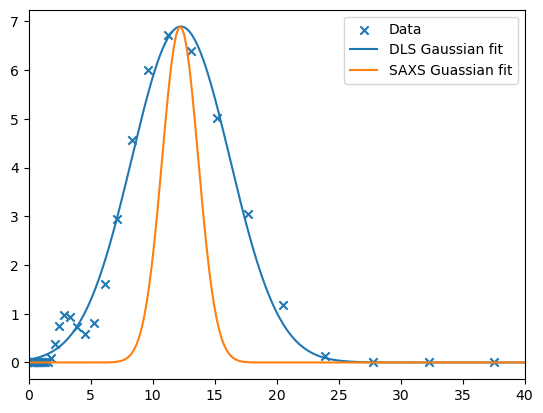

In [95]:
plt.scatter(dg_x, dg_y, marker = 'x', label = 'Data')
plt.plot(fit_x, fit_y, label = 'DLS Gaussian fit')
plt.plot(fit_x, saxs_lu, label = 'SAXS Guassian fit')
plt.legend()
plt.xlim(0,40)

(0.0, 80.0)

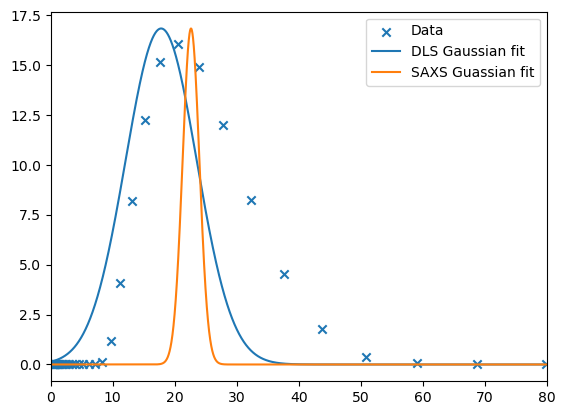

In [96]:
plt.scatter(g_x, g_y, marker = 'x', label = 'Data')
plt.plot(fit_gx, fit_gy, label = 'DLS Gaussian fit')
plt.plot(fit_gx, saxs_si, label = 'SAXS Guassian fit')
plt.legend()
plt.xlim(0,80)

In [97]:
mm2[1]/mm2[2]

3.101949512504765

In [110]:
print(mm2)
print(ee2)
print(cc2)

[16.84566225 17.80892961  5.7412055 ]
[2.3764352  1.22831952 0.95038587]
8.20910402228263


In [107]:
print(np.array(dg_vals))
print(np.array(dg_err))
print(dg_c)

[ 6.89829121 12.27756001 -3.96086573]
[1.16352188 0.83528886 0.72986832]
0.6624706320536917


## Diffusion

In [136]:
Kb = 1.38 * 1e-23
T = 298.15
eta = 0.001
pi = np.pi
sigma_T = 0.5

# R = (kB T) / (D_0 6 pi eta)

def D(R):
    D = (Kb * T) / (R * 6 * pi * eta) 
    return D

def uncD(R, sigma_R,):
    constant = Kb / (6 * np.pi * eta)
    term1 = (T / (R ** 2)) * sigma_R
    term2 = (1 / R) * sigma_T
    return constant * np.sqrt(term1 ** 2 + term2 ** 2)

In [134]:
print(D(mm1[1] * 1e-9) * 1e12) 
print(D(dg_vals[1] * 1e-9) * 1e12)

9.651591081318019
17.778729054767986


In [140]:
print(uncD(mm1[1] * 1e-9, ee1[1] * 1e-9) * 1e12)
print(uncD(dg_vals[1] * 1e-9, dg_err[1] * 1e-9) * 1e12)

0.5821069405635457
1.209921617974055
